## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from collections import ChainMap
%matplotlib inline

## read data

In [2]:
!ls training_data_first/

public_train_x_ccba_full_hashed.csv     public_train_x_remit1_full_hashed.csv
public_train_x_cdtx0001_full_hashed.csv public_x_alert_date.csv
public_train_x_custinfo_full_hashed.csv train_x_alert_date.csv
public_train_x_dp_full_hashed.csv       train_y_answer.csv


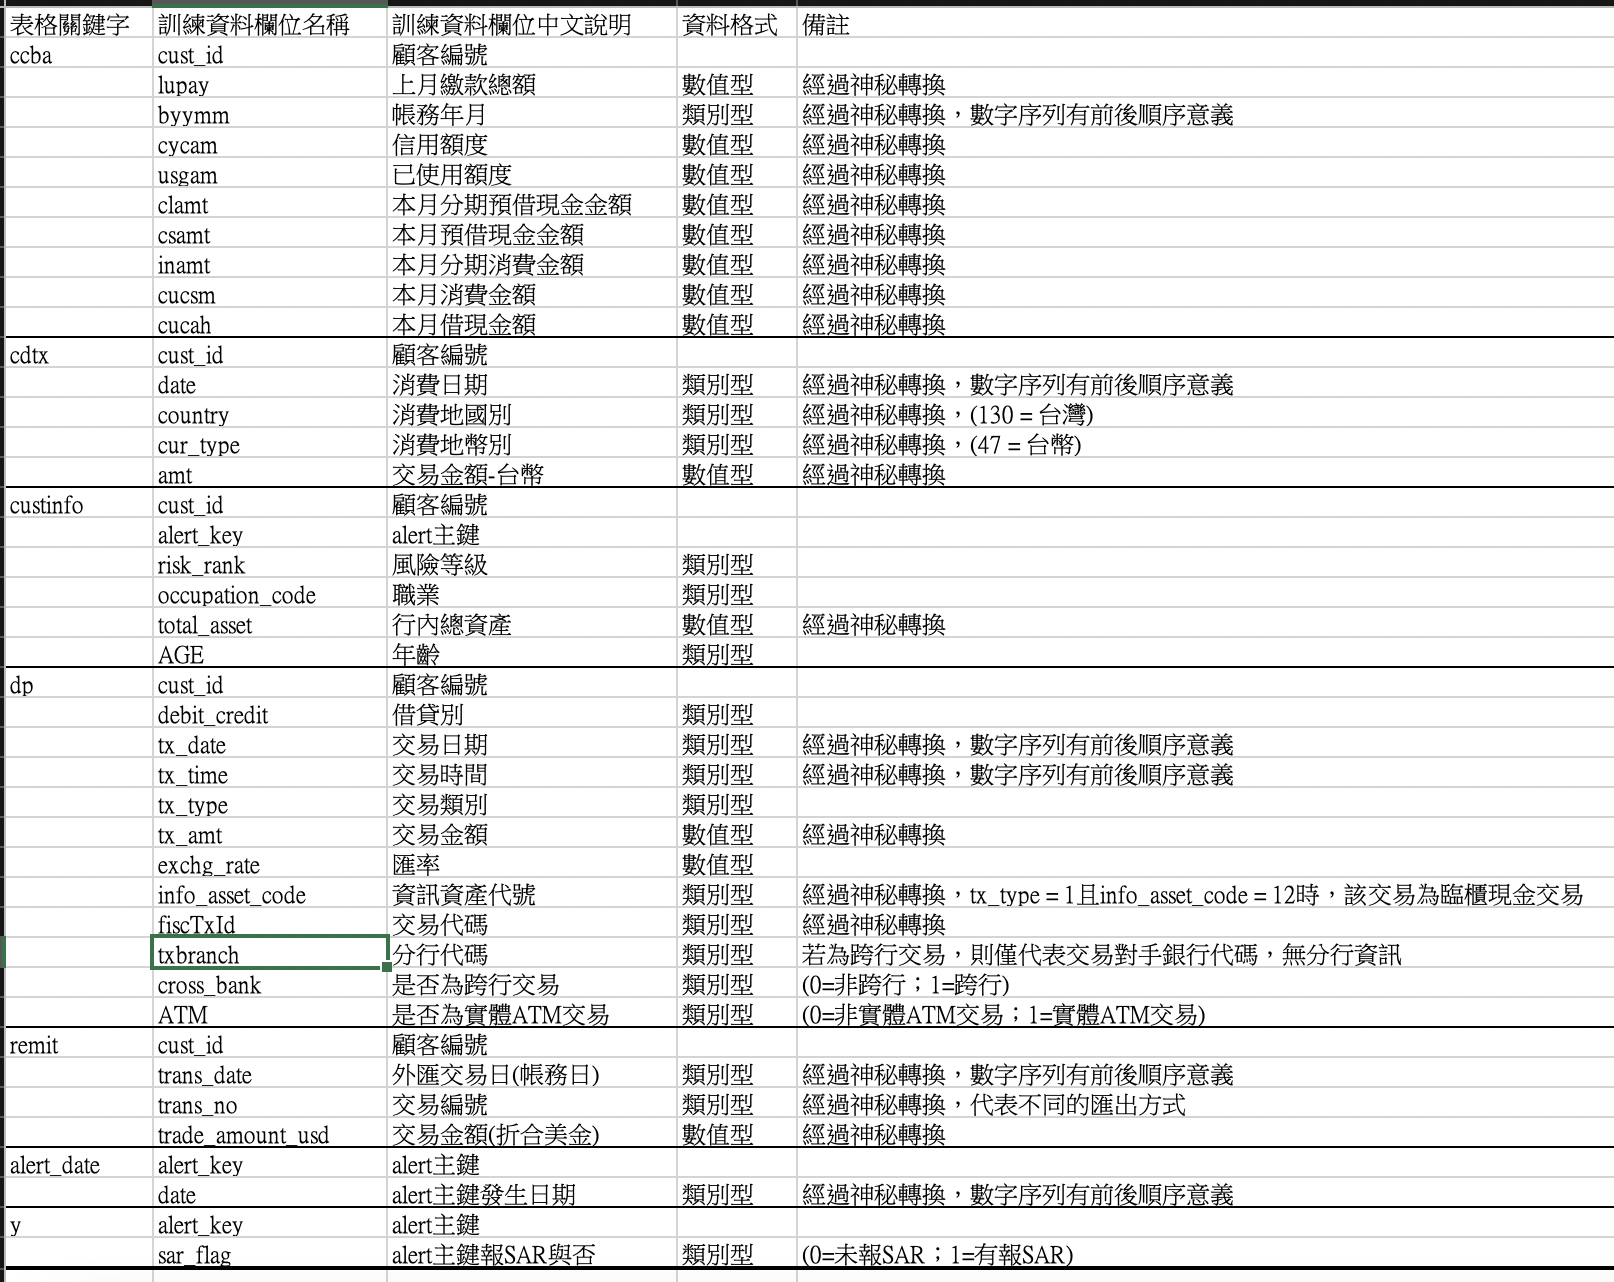

In [3]:
df_ccba = pd.read_csv('training_data_first/public_train_x_ccba_full_hashed.csv')
df_cbtx = pd.read_csv('training_data_first/public_train_x_cdtx0001_full_hashed.csv')
df_custinfo = pd.read_csv('training_data_first/public_train_x_custinfo_full_hashed.csv')
df_dp = pd.read_csv('training_data_first/public_train_x_dp_full_hashed.csv')
df_remit = pd.read_csv('training_data_first/public_train_x_remit1_full_hashed.csv')
df_alertday_public = pd.read_csv('training_data_first/public_x_alert_date.csv')
df_alertday_train = pd.read_csv('training_data_first/train_x_alert_date.csv')
# this seems useless; but maybe can consider it as a predict target?
df_y = pd.read_csv('training_data_first/train_y_answer.csv')
df_sample_submission = pd.read_csv('sample_submission.csv')

data = {
    'monthly': df_ccba,
    'transaction': df_cbtx,
    'custinfo': df_custinfo,
    'credit': df_dp,
    'exchange': df_remit,
    'y': df_y,
    'train_date': df_alertday_train,
    'test_date': df_alertday_public
}

In [4]:
len(df_sample_submission)

3850

In [5]:
for name, df in data.items():
    print(name, 'length:', len(df))
    display(df.isna().sum())
    print('-' * 50)

monthly length: 59075


cust_id    0
lupay      0
byymm      0
cycam      0
usgam      0
clamt      0
csamt      0
inamt      0
cucsm      0
cucah      0
dtype: int64

--------------------------------------------------
transaction length: 1043014


cust_id     0
date        0
country     0
cur_type    0
amt         0
dtype: int64

--------------------------------------------------
custinfo length: 25751


alert_key            0
cust_id              0
risk_rank            0
occupation_code    116
total_asset          0
AGE                  0
dtype: int64

--------------------------------------------------
credit length: 1969818


cust_id                  0
debit_credit             0
tx_date                  0
tx_time                  0
tx_type                  0
tx_amt               22015
exchg_rate               0
info_asset_code          0
fiscTxId           1043090
txbranch           1003150
cross_bank               0
ATM                      0
dtype: int64

--------------------------------------------------
exchange length: 17167


cust_id             0
trans_date          0
trans_no            0
trade_amount_usd    0
dtype: int64

--------------------------------------------------
y length: 23906


alert_key    0
sar_flag     0
dtype: int64

--------------------------------------------------
train_date length: 23906


alert_key    0
date         0
dtype: int64

--------------------------------------------------
test_date length: 1845


alert_key    0
date         0
dtype: int64

--------------------------------------------------


## take a look at the distribution of y

<AxesSubplot:>

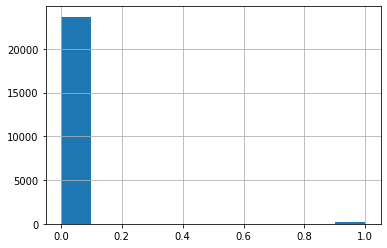

In [6]:
df_y['sar_flag'].hist()

In [7]:
df_y[df_y['sar_flag'] == 1].tail(10)

,alert_key,sar_flag
18847,313558,1
18948,316664,1
20439,323358,1
22681,341482,1
22990,343888,1
23164,346021,1
23308,347051,1
23368,347894,1
23572,348724,1
23760,351367,1


## take a look at "one" row of data

In [8]:
df_custinfo[df_custinfo['alert_key'] == 352080]

,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
25734,352080,1a93961c8fa830a1f32f5316b44f4964d65397f0311b11...,2,9.0,69080.0,6


In [9]:
# look at one customer
# peek_id = df_cbtx.iloc[18, 0]
def show_alert_key_info(alert_key): # 352132
    '''
    a function to preliminary inspect a "alert key" of data
    '''
    peek_id = df_custinfo[df_custinfo['alert_key'] == alert_key]['cust_id'].values[0]
    print('ccba')
    display(df_ccba.groupby('cust_id').get_group(peek_id))
    print('cbtx') # not every cust_id exist in each df
    display(df_cbtx.groupby('cust_id').get_group(peek_id))
    print('dp')
    display(df_dp.groupby('cust_id').get_group(peek_id))
    print('remit')
    try:
        display(df_remit.groupby('cust_id').get_group(peek_id))
    except KeyError:
        print('no remit info')
    print('custinfo')
    display(df_custinfo.groupby('cust_id').get_group(peek_id))
    corresponding_alert_key = df_custinfo.groupby('cust_id').get_group(peek_id)['alert_key'].tolist()
    print(corresponding_alert_key)
    print('y') # key is different to cust_id
    display(df_y[df_y['alert_key'].isin(corresponding_alert_key)])
    display(df_alertday_train[df_alertday_train['alert_key'].isin(corresponding_alert_key)])
    print('public set')
    display(df_alertday_public[df_alertday_public['alert_key'].isin(corresponding_alert_key)])
    print('sample_submission')
    display(df_sample_submission[df_sample_submission['alert_key'].isin(corresponding_alert_key)])

In [10]:
# 352132
# 171770
show_alert_key_info(352132)

ccba


,cust_id,lupay,byymm,cycam,usgam,clamt,csamt,inamt,cucsm,cucah
4730,c49b33d1fde790ec03584672903f296e486615adfdc989...,190069.0,0,306146.0,273225.0,0.0,0.0,0.0,265209.0,0.0
4731,c49b33d1fde790ec03584672903f296e486615adfdc989...,532534.0,30,357170.0,53545.0,0.0,0.0,0.0,285761.0,0.0
4732,c49b33d1fde790ec03584672903f296e486615adfdc989...,286675.0,61,306146.0,216241.0,0.0,0.0,0.0,204745.0,0.0
4733,c49b33d1fde790ec03584672903f296e486615adfdc989...,205338.0,91,306146.0,72618.0,0.0,0.0,0.0,265322.0,0.0
4734,c49b33d1fde790ec03584672903f296e486615adfdc989...,265789.0,122,357170.0,72958.0,0.0,0.0,0.0,316531.0,0.0
4735,c49b33d1fde790ec03584672903f296e486615adfdc989...,317495.0,153,306146.0,217278.0,0.0,0.0,0.0,210570.0,0.0
4736,c49b33d1fde790ec03584672903f296e486615adfdc989...,210934.0,183,306146.0,215772.0,0.0,0.0,0.0,188442.0,0.0
4737,c49b33d1fde790ec03584672903f296e486615adfdc989...,597162.0,214,408194.0,188693.0,0.0,0.0,0.0,586995.0,0.0
4738,c49b33d1fde790ec03584672903f296e486615adfdc989...,456877.0,244,408194.0,30795.0,0.0,0.0,0.0,292056.0,0.0
4739,c49b33d1fde790ec03584672903f296e486615adfdc989...,17223.0,275,408194.0,251529.0,0.0,0.0,0.0,218397.0,0.0


cbtx


,cust_id,date,country,cur_type,amt
98328,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,130,47,1609.0
98329,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,130,47,77.0
98330,c49b33d1fde790ec03584672903f296e486615adfdc989...,2,130,47,127.0
98331,c49b33d1fde790ec03584672903f296e486615adfdc989...,3,130,47,40.0
98332,c49b33d1fde790ec03584672903f296e486615adfdc989...,2,130,47,167.0
...,...,...,...,...,...
101580,c49b33d1fde790ec03584672903f296e486615adfdc989...,393,130,47,283.0
101581,c49b33d1fde790ec03584672903f296e486615adfdc989...,393,130,47,308.0
101582,c49b33d1fde790ec03584672903f296e486615adfdc989...,392,130,47,31.0
101583,c49b33d1fde790ec03584672903f296e486615adfdc989...,394,130,47,31.0


dp


,cust_id,debit_credit,tx_date,tx_time,tx_type,tx_amt,exchg_rate,info_asset_code,fiscTxId,txbranch,cross_bank,ATM
337312,c49b33d1fde790ec03584672903f296e486615adfdc989...,CR,225,16,2,279668.0,1.000,6,NaN,NaN,0,0
337313,c49b33d1fde790ec03584672903f296e486615adfdc989...,DB,235,9,2,270079.0,1.000,16,NaN,NaN,0,0
337314,c49b33d1fde790ec03584672903f296e486615adfdc989...,DB,228,15,2,23113.0,1.000,6,NaN,NaN,0,0
337315,c49b33d1fde790ec03584672903f296e486615adfdc989...,CR,81,0,2,155604.0,1.000,16,NaN,NaN,0,0
337316,c49b33d1fde790ec03584672903f296e486615adfdc989...,DB,327,9,2,198372.0,1.000,16,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
337464,c49b33d1fde790ec03584672903f296e486615adfdc989...,CR,351,20,2,40973.0,4.441,20,NaN,NaN,0,1
337465,c49b33d1fde790ec03584672903f296e486615adfdc989...,CR,349,15,2,1002.0,28.616,20,NaN,NaN,0,1
337466,c49b33d1fde790ec03584672903f296e486615adfdc989...,CR,334,13,2,139309.0,1.000,13,4.0,141.0,1,1
337467,c49b33d1fde790ec03584672903f296e486615adfdc989...,DB,357,17,2,286812.0,1.000,13,4.0,0.0,0,1


remit


,cust_id,trans_date,trans_no,trade_amount_usd
3951,c49b33d1fde790ec03584672903f296e486615adfdc989...,228,4,364459.0


custinfo


,alert_key,cust_id,risk_rank,occupation_code,total_asset,AGE
766,357526,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3
1160,360094,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3
25519,350046,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,1075983.0,3
25676,351377,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,1075983.0,3
25750,352132,c49b33d1fde790ec03584672903f296e486615adfdc989...,1,19.0,3218731.0,3


[357526, 360094, 350046, 351377, 352132]
y


,alert_key,sar_flag
23649,350046,0
23807,351377,0
23901,352132,0


,alert_key,date
23649,350046,361
23807,351377,363
23901,352132,364


public set


,alert_key,date
193,357526,370
712,360094,377


sample_submission


,alert_key,probability
1972,357526,0.507329
2282,360094,0.587626


In [11]:
class Preprocess:
    '''
    class for storing all function for preprocessing
    not storing data here, this may not be a good class using example
    the spirit of class: data with operation
    maybe better way: open another script name "preprocess.py" and store these code
    but now in the developing process, everything is dynamic, so it is ok
    '''
    def __init__(self, data):
        self.data = data
        self.history_data_names = ['monthly', 'transaction', 'credit', 'exchange']
        self.groupby = {k: data[k].groupby('cust_id') for k in self.history_data_names}
    
    @staticmethod
    def collect_history(df_groupby, id_, date, date_key, id_key='cust_id'):
        '''
        df: target feature DataFrame
        id_: the customer id
        date: the date of "now"
        date_key: column name for the date
        id_key: column name for id_
        '''
        try:
            # doing groupby when iterate each row is waste of time
            df_person = df_groupby.get_group(id_)
            history = df_person[df_person[date_key] <= date]
        except KeyError:
            history = None
        return history
    
    def collect_one_row_data(
        self,
        alert_key, 
        train=True, 
        key_name='alert_key', 
        id_key='cust_id',
        label_name='sar_flag',
        date_name='date',
    ):
        # collect timestamp data
        row_main = self.data['custinfo'][self.data['custinfo'][key_name] == alert_key]
        cust_id = row_main[id_key].values[0]
        
        if train:
            y = self.data['y'][self.data['y'][key_name] == alert_key][label_name].values[0]
            date = self.data['train_date'][self.data['train_date'][key_name] == alert_key][date_name].values[0]
        else:
            date = self.data['test_date'][self.data['test_date'][key_name] == alert_key][date_name].values[0]
            y = None
            
        # doing OHE here
        personal_info = {
            'age': row_main['AGE'].values[0],
            'total_asset': row_main['total_asset'].values[0],
            'risk_rank': row_main['risk_rank'].values[0],
            'occupation': row_main['occupation_code'].values[0]
        }
        
        # not using OHE because it harm the performance of logistic
        # for i in range(21):
        #     if i == occupation:
        #         personal_info[f'occupation_{i}'] = 1
        #     else:
        #         personal_info[f'occupation_{i}'] = 0

        # collect history data
        history_ccba = self.collect_history(self.groupby['monthly'], cust_id, date, 'byymm')
        history_cbtx = self.collect_history(self.groupby['transaction'], cust_id, date, 'date')
        history_dp = self.collect_history(self.groupby['credit'], cust_id, date, 'tx_date')
        history_remit = self.collect_history(self.groupby['exchange'], cust_id, date, 'trans_date')

        # collect all data as a dictionary
        row_data = {
            'alert_key': alert_key,
            'personal_info': personal_info,
            'cust_id': cust_id,
            'date': date,
            'y': y,
            'monthly': history_ccba,
            'transaction': history_cbtx,
            'credit': history_dp,
            'exchange': history_remit
        }

        return row_data

In [12]:
# it is no chance that you can make it one time, so just give a checkpoint version
# hypothesis: stable will lead to no SAR, use local information
# I want to make the pipeline are assembled as parts
# 1. preprocessing
# 2. feature aggregator (may combined into model in end-to-end setting)
# 3. model
# 4. inferenceing
# 5. evaluation
class Aggregator:
    '''
    base class for all aggregator?
    I can do it that top-down, so bottom-up first
    '''
    def __init__(self):
        pass
    def rule_base_aggregate(self, df):
        pass

class MonthlyAggregator:
    '''
    class for aggregating history function
    time length will scale up all the numbers, so need some average stuff
    some column is often 0, that would be useless
    '''
    def __init__(self):
        self.not_use_feature = ['byymm']
        self.use_feature = []
        
    def rule_base_aggregate(self, df):
        '''
        df: 
        '''
        output = {
            'mean_use_rate': 0,
            'mean_consume_rate': 0,
            'mean_borrow_rate': 0
        }
        if df is None or len(df) == 0:
            return output
        
        # might be infinity here...
        df['use_rate'] = df['usgam'] / df['cycam']
        # df['use_rate_norm'] = df['use_rate'].map(lambda x: min(100, x))
        df['consume_rate'] = df['cucsm'] / df['cycam']
        df['borrow_rate'] = df['cucah'] / df['cycam']
        
        mean_use_rate = min(df['use_rate'].mean(), 100)
        mean_consume_rate = df['consume_rate'].mean()
        mean_borrow_rate = df['borrow_rate'].mean()
        
        # prepare output
        output['mean_use_rate'] = mean_use_rate
        output['mean_consume_rate'] = mean_consume_rate
        output['mean_borrow_rate'] = mean_borrow_rate
        
        return output
        
    
class TransactionAggregator:
    
    def __init__(self):
        pass
        
    def rule_base_aggregate(self, df, date, window):
        if df is None or len(df) == 0:
            return {
            'mean_transaction': 0,
            'std_transaction': 0,
            'num_transaction': 0
        }
        
        df_window = df[df['date'] > (date - window)].copy()
        
        mean_amt_trans = df_window['amt'].mean()
        std_amt_trans = df_window['amt'].std()
        num_trans = len(df_window)
    
        return {
            'mean_transaction': mean_amt_trans,
            'std_transaction': std_amt_trans,
            'num_transaction': num_trans
        }
    def model_aggregate(self, df):
        pass
        
        
    
class CreditAggregator:
    
    def __init__(self):
        pass
    
    def rule_base_aggregate(self, df, date, window):
        '''
        mean, std
        ratio of credit transaction
        ratio of cash transaction
        cross_bank ratio
        ATM ratio
        region infomation???
        '''
        output = {
            'num_credit': 0,
            'mean_credit': 0,
            'std_credit': 0,
            'ratio_credit': 0,
            'ratio_crossbank': 0,
            'ratio_atm': 0,
            'ratio_cash': 0
        }
        if df is None or len(df) == 0:
            return output
        
        df_window = df[df['tx_date'] >= (date - window)].copy()
        # there maybe no data in the last 30 days
        if len(df_window) == 0:
            return output
        
        df_window['amt_twd'] = df_window['tx_amt'] * df_window['exchg_rate']
        
        # this may need scaling (not standardizing)
        mean_amt_twd = df_window['amt_twd'].mean()
        std_amt_twd = df_window['amt_twd'].std()
        
        num_total = len(df_window)
        ratio_credit = len(df_window[df_window['debit_credit'] == 'CR']) / len(df_window)
        ratio_crossbank = df_window['cross_bank'].sum() / len(df_window)
        ratio_cash = len(df_window[(df_window['tx_type']==1) & (df_window['info_asset_code']==12)]) / len(df_window)
        ratio_atm = df_window['ATM'].sum() / num_total
        
        # prepare output
        output['num_credit'] = num_total
        output['mean_credit'] = mean_amt_twd
        output['std_credit'] = std_amt_twd
        output['ratio_credit'] = ratio_credit
        output['ratio_crossbank'] = ratio_crossbank
        output['ratio_cash'] = ratio_cash
        output['ratio_atm'] = ratio_atm
        
        return output
        
class ExchangeAggregator:
    '''
    seems few data
    trans_no may contain useful info?
    trans_amount_usd
    '''
    def __init__(self):
        self.use_feature = ['trade_amount_usd']
    
    def rule_base_aggregate(self, df):
        pass

In [13]:
preprocess = Preprocess(data)
monthly_aggregator = MonthlyAggregator()
credit_aggregator = CreditAggregator()
transaction_aggregator = TransactionAggregator()

In [14]:
def aggregate_feature(
    alert_key,
    train=True,
    mode='rule_base',
    preprocess=preprocess, 
    monthly_aggregator=monthly_aggregator, 
    credit_aggregator=credit_aggregator, 
    transaction_aggregator=transaction_aggregator,
):
    row_data = preprocess.collect_one_row_data(alert_key, train=train)
    personal_feature = row_data['personal_info']
    
    if mode == 'rule_base':
        monthly_feature = monthly_aggregator.rule_base_aggregate(row_data['monthly'])
        credit_feature = credit_aggregator.rule_base_aggregate(
            row_data['credit'],
            row_data['date'],
            30
        )
        transaction_feature = transaction_aggregator.rule_base_aggregate(
            row_data['transaction'],
            row_data['date'],
            30
        )
        # exchange_feature
    
#     display(monthly_feature)
#     display(credit_feature)
#     display(transaction_feature)
#     display(personal_feature) # total asset can be normalized
    
    
    y = row_data['y'] if train else None
    X = dict(ChainMap(*[personal_feature, 
                        monthly_feature, 
                        credit_feature, 
                        transaction_feature]))
    return X, y

## Prepare data

In [15]:
X_train, y_train = [], []
for key in df_alertday_train['alert_key'].values:
    X, y = aggregate_feature(key)
    X_train.append(X)
    y_train.append(y)

X_test = []
for key in df_alertday_public['alert_key'].values:
    X, _ = aggregate_feature(key, train=False)
    X_test.append(X)
    
df_X_train = pd.DataFrame(X_train)
df_X_test = pd.DataFrame(X_test)
# problem
# 1. the first few rows will lack of features (all 0)
# 2. the information richness is different through time
# 3. need to one hot encoding the occupation and maybe age

In [16]:
df_X_train = df_X_train.fillna(0)
df_X_test = df_X_test.fillna(0)

In [17]:
df_X_train.head()

,mean_transaction,std_transaction,num_transaction,num_credit,mean_credit,std_credit,ratio_credit,ratio_crossbank,ratio_atm,ratio_cash,mean_use_rate,mean_consume_rate,mean_borrow_rate,age,total_asset,risk_rank,occupation
0,673.0,0.0,1,3,505.000000,450.223278,0.000000,0.0,1.0,0.000000,0.511652,0.502729,0.0,4,375576.0,1,17.0
1,0.0,0.0,0,3,69734.000000,75670.655263,0.333333,0.0,0.0,0.333333,0.000000,0.000000,0.0,2,2717416.0,3,12.0
2,0.0,0.0,0,4,77648.250000,134725.210913,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.0,4,326517.0,1,12.0
3,0.0,0.0,0,10,4312.500000,5920.365665,0.000000,0.0,0.9,0.000000,0.000000,0.000000,0.0,4,1014759.0,3,14.0
4,0.0,0.0,0,60,4939.066667,6547.864806,0.950000,0.3,1.0,0.000000,0.548931,0.082769,0.0,3,241719.0,3,12.0


In [18]:
df_X_train.describe()

,mean_transaction,std_transaction,num_transaction,num_credit,mean_credit,std_credit,ratio_credit,ratio_crossbank,ratio_atm,ratio_cash,mean_use_rate,mean_consume_rate,mean_borrow_rate,age,total_asset,risk_rank,occupation
count,2.390600e+04,2.390600e+04,23906.000000,23906.000000,2.390600e+04,2.390600e+04,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,23906.000000,2.390600e+04,23906.000000,23906.000000
mean,1.151632e+04,1.368694e+04,47.984230,134.065967,6.557127e+05,2.382204e+06,0.423888,0.166478,0.603270,0.029827,0.212211,1.934785,0.000998,3.644441,7.194439e+05,1.618255,14.206726
std,1.574504e+05,2.316857e+05,366.300896,771.555971,2.926629e+06,1.543181e+07,0.270094,0.200643,0.401259,0.097980,1.026094,6.018424,0.018243,1.312016,2.503093e+06,0.909551,4.765114
min,0.000000e+00,0.000000e+00,0.000000,0.000000,-5.148947e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-6.593338,-0.258706,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,0.000000,5.000000,2.967804e+03,3.453995e+03,0.250000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,3.000000,6.711250e+03,1.000000,12.000000
50%,4.181623e+02,1.155783e+02,2.000000,30.000000,4.213451e+04,7.503984e+04,0.448598,0.102564,0.777778,0.000000,0.031960,0.035108,0.000000,3.000000,1.247560e+05,1.000000,15.000000
75%,3.381737e+03,4.964840e+03,27.000000,84.000000,2.881604e+05,6.690778e+05,0.571429,0.256673,0.972222,0.000000,0.366575,0.357520,0.000000,4.000000,5.934900e+05,3.000000,19.000000
max,1.410076e+07,2.442174e+07,13737.000000,14120.000000,1.737432e+08,4.309896e+08,1.000000,1.000000,1.000000,1.000000,100.000000,113.832828,0.905661,10.000000,7.386321e+07,3.000000,20.000000


In [19]:
df_X_test.head()

,mean_transaction,std_transaction,num_transaction,num_credit,mean_credit,std_credit,ratio_credit,ratio_crossbank,ratio_atm,ratio_cash,mean_use_rate,mean_consume_rate,mean_borrow_rate,age,total_asset,risk_rank,occupation
0,1022.125,1532.152215,8,113,2.460120e+06,6.476558e+06,0.407080,0.150442,0.902655,0.0,0.057787,0.040246,0.0,3,506366.0,1,17.0
1,0.000,0.000000,0,3,1.618600e+04,2.376872e+04,1.000000,0.000000,0.333333,0.0,0.000000,0.000000,0.0,4,309830.0,1,12.0
2,202.400,571.994855,15,90,4.414117e+04,1.074687e+05,0.522222,0.022222,0.911111,0.0,0.020114,0.020073,0.0,3,444392.0,1,2.0
3,0.000,0.000000,0,9,1.114467e+04,5.357324e+03,0.333333,0.444444,0.777778,0.0,0.000000,0.000000,0.0,4,143930.0,1,19.0
4,0.000,0.000000,0,26,4.630134e+05,2.248984e+06,0.461538,0.307692,0.961538,0.0,0.000000,0.000000,0.0,2,2112.0,3,17.0


In [20]:
# this need to aggregate into some pipeline, or it will be easily forget
# remember transform parameters should stick to train
from sklearn.preprocessing import StandardScaler
cols_to_norm = ['mean_transaction', 'std_transaction', 'num_credit', 'mean_credit', 'std_credit', 'mean_use_rate', 'mean_use_rate', 'total_asset']
scaler = StandardScaler()
scaler.fit(df_X_train[cols_to_norm])
df_X_train[cols_to_norm] = scaler.transform(df_X_train[cols_to_norm])
df_X_test[cols_to_norm] = scaler.transform(df_X_test[cols_to_norm])

## Modeling & Inferencing

In [21]:
models = dict()

In [22]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(class_weight='balanced', n_jobs=4, max_iter=10000)
logistic.fit(df_X_train.values, y_train)
models['logistic'] = logistic
# the data is imbalanced, maybe try boostrap training?

In [23]:
# tree models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
# from lightgbm import LGBMClassifier

tree_models = {
    'decision_tree': DecisionTreeClassifier(class_weight='balanced'), 
    'random_forest': RandomForestClassifier(n_jobs=4, class_weight='balanced'), 
    'adaboost': AdaBoostClassifier(), 
    'gradientboost': GradientBoostingClassifier(), 
#     LGBMClassifier
}
for name, model in tree_models.items():
    model.fit(df_X_train.values, y_train)
    models[name] = model

## Evaluation

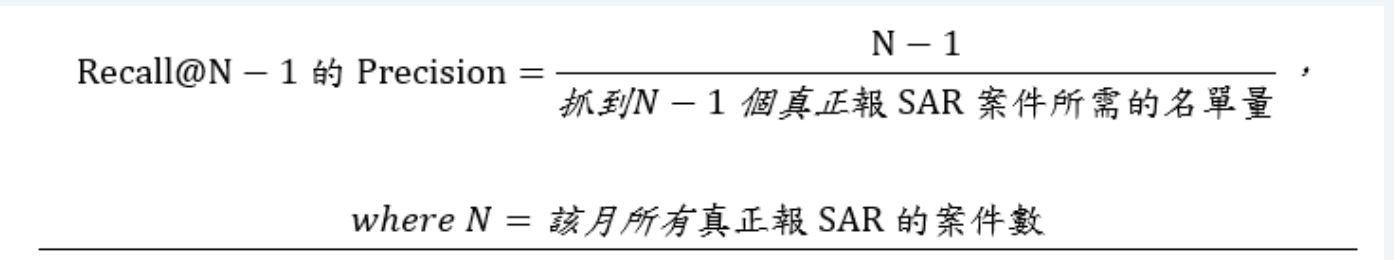

In [24]:
# TODO: cross validation and error analysis
class Evaluation:
    '''
    this class need to be refined, use staticmethod for now
    '''
    
    def __init__(self, 
                 df_X_train=df_X_train, 
                 df_key_train=df_alertday_train,
                 df_y_train=df_y, 
                 df_X_test=df_X_test,
                 df_key_test=df_alertday_public
    ):
        self.df_X_train = df_X_train
        self.df_y_train = df_y_train
        self.df_key_train = df_alertday_train
        self.df_X_test = df_X_test
        self.df_key_test = df_key_test
    
    @staticmethod
    def calculate_metric(prediction, answer):
        ans_with_label1 = set(answer[answer['sar_flag'] == 1]['alert_key'].values)
        N = len(ans_with_label1) # shall not be a large number
        # sorted_prediction = sort prediction by probability
        sorted_pred = prediction.sort_values('probability', ascending=False, ignore_index=True)
        # get the indexes for all alert_key in answer_label
        pred_index_sorted = sorted_pred[sorted_pred['alert_key'].isin(ans_with_label1)].index.values
        pred_index_sorted.sort()
        # get the second largest one as denominator
        denominator = pred_index_sorted[-2]
        # calculate
        return (N - 1) / denominator
    
    @staticmethod
    def get_prediction(model, df_X, df_key):
        predict_proba = model.predict_proba(df_X.values)
        output = {
            'alert_key': df_key['alert_key'].values,
            'probability': predict_proba[:, 1]
        }
        output = pd.DataFrame(output)
        return output
    
    @staticmethod
    def prepare_submission_csv(model, filename, 
                               df_X_test=df_X_test, 
                               df_key=df_alertday_public, 
                               df_sample_submission=df_sample_submission):
        # public set
        df_submission_public = Evaluation.get_prediction(model, df_X_test, df_alertday_public) # is this wired way to write?
        
        # get private set 
        df_submission = df_submission_public.merge(df_sample_submission, how='outer', on='alert_key')
        df_submission_private = df_submission[df_submission['probability_x'].isna()].drop('probability_x', axis=1).copy()
        df_submission_private = df_submission_private.rename({'probability_y': 'probability'}, axis=1)
        # final submission
        df_submission = pd.concat([df_submission_public, df_submission_private])
        df_submission.to_csv(filename, index=False)
        
        return df_submission

In [25]:
for name, model in models.items():
    prediction_train = Evaluation.get_prediction(model, df_X_train, df_alertday_train)
    train_score = Evaluation.calculate_metric(prediction_train, df_y)
    print(name, ':', train_score)

logistic : 0.012639001898562516
decision_tree : 1.0043103448275863
random_forest : 1.0043103448275863
adaboost : 0.01846861128725428
gradientboost : 0.019434481608140795


In [26]:
gradientboost_submission = Evaluation.prepare_submission_csv(models['gradientboost'], 'gradientboost_baseline.csv')

In [27]:
logistic_submission = Evaluation.prepare_submission_csv(logistic, 'logistic_baseline.csv')

In [28]:
performance_record = {
    # slightly overfit
    'logistic': {'model': models['logistic'], 'public_score': 0.008929, 'train_score': 0.009884},
    'gradientboost': {'model': models['gradientboost'], 'public_score':0.008012, 'train_score':0.019434}
}